# Support Vector Machine

* Collection of input vectors $\mathbf x_i$ for $i=1,\dots,N$ and $\mathbf x_i \in {\rm I\!R}^m$
* Without loss of generality we will assume that the last element of every vector $\mathbf x_i$ is -1.
* For each $\mathbf x_i$ there is one label $y_i$ associated. The label can be -1 or 1.
* We want to derive a function $f(x)$  which predicts the labels $y$.
* A perfect function $f$, would return $J[f] = 0$ for the cost function:

$$
J[f] = \sum_{i=1}^N (1 - y_i f(\mathbf x_i) ) 
$$

* We allow our functions to have values different from -1 and 1.
* If $f(x) \ge 1$, we predict label +1
* If $f(x) \le -1$, we predict label -1

$$
J[f] = \sum_{i=1}^N (1 - y_i f(\mathbf x_i) )^+ 
$$

where $x^+ = 0$ if $x < 0$ and $x^+ = x$ if $x \gt 0$


* Linear function:

$$
f(\mathbf x) = \mathbf w^T \mathbf x
$$


$$
J[w] = \sum_{i=1}^N (1 - y_i \mathbf w^T \mathbf x_i )^+ 
$$

with regularization

$$
J[w] = \lambda \| \mathbf w \|^2 + \sum_{i=1}^N (1 - y_i \mathbf w^T \mathbf x_i )^+ 
$$


where $\| \mathbf w \|^2 = \mathbf w^T \mathbf w = \sum_{j=1}^m w_j^2$

Derivatives

$$
\frac{\partial \| \mathbf w \|^2}{\partial w_j} = 2 w_j
$$

$$
\frac{\partial}{\partial w_j} (1 - y_i \mathbf w^T \mathbf x_i ) = - y_i (x_i)_j
$$

where $(x_i)_j$ is the $j$-th component of the $i$-th vector.




Sample data (x) and labels (y).
`x[i,j]` is the j-th component of the i-th sample


In [1]:
x = [-2 4 -1;
    4 1 -1;
    1  6 -1;
    2  4 -1;
    6 2 -1]

5×3 Array{Int64,2}:
 -2  4  -1
  4  1  -1
  1  6  -1
  2  4  -1
  6  2  -1

In [2]:
y = [-1,-1,1,1,1]

5-element Array{Int64,1}:
 -1
 -1
  1
  1
  1

In [3]:
using PyPlot

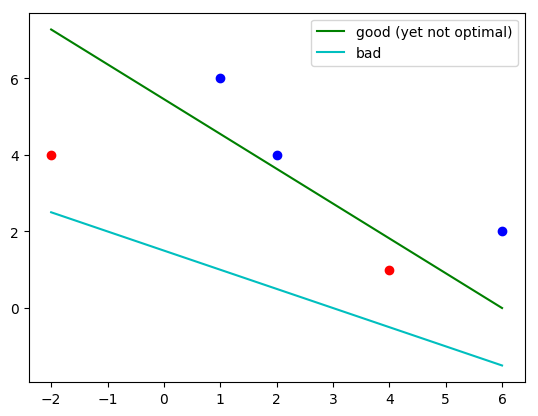

PyObject <matplotlib.legend.Legend object at 0x7f281af95cd0>

In [4]:
w = [1,1.1,6]
wbad = [1,2,3]

function plotdata(x,y)
ind = find(y .== -1)
plot(x[ind,1],x[ind,2],"ro")
ind = find(y .== 1)
plot(x[ind,1],x[ind,2],"bo")
end

function plotboundary(w;kwargs...)
  t = -2:6
  plot(t,(w[3] - w[1]*t)/w[2]; kwargs...)
end

plotdata(x,y)
plotboundary(w; color="g", label="good (yet not optimal)")
plotboundary(wbad; color="c", label="bad")
legend()

Equation of the decision line:

$w_1 x_1 + w_2 x_2 + w_3 x_3 = 0$ as we set $x_3 = -1$

$x_2 = \frac{w_3 - w_1 x_1}{w_2}$ 

as long as $w_2$ is different from zero.


Cost functions

In [5]:

function J(w,λ,x,y)
   Jvalue = λ*(w ⋅ w)
   for i = 1:size(x,1)
        tmp = 1 - y[i] * (w ⋅ x[i,:])
        if tmp > 0
           Jvalue += tmp
        end
    end
    return Jvalue
end

J (generic function with 1 method)

Gradient of the cost function

In [6]:
function ∇J(w,λ,x,y)
   ∇Jvalue = 2*λ*w
   for i = 1:size(x,1)
        tmp = 1 - y[i] * (w ⋅ x[i,:])
        if tmp > 0
           ∇Jvalue -= y[i] * x[i,:]
        end
    end
    return ∇Jvalue
end

∇J (generic function with 1 method)

Let's compare the cost function for the two different lines (pretty good and the bad line):

In [7]:
λ = 0.
@show J(w,λ,x,y)
@show J(wbad,λ,x,y)


J(w, λ, x, y) = 0.6999999999999993
J(wbad, λ, x, y) = 8.0


8.0

Check the gradient by finite difference


In [8]:
e = [1,0,0]
ϵ = 0.00001
(J(w + ϵ * e,λ,x,y) - J(w,λ,x,y))/ϵ

2.0000000000131024

In [9]:
e ⋅ ∇J(w,λ,x,y)

2.0

Optimize the w using the gradient descent method

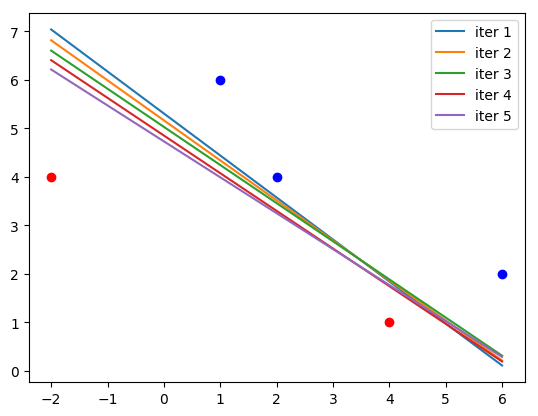

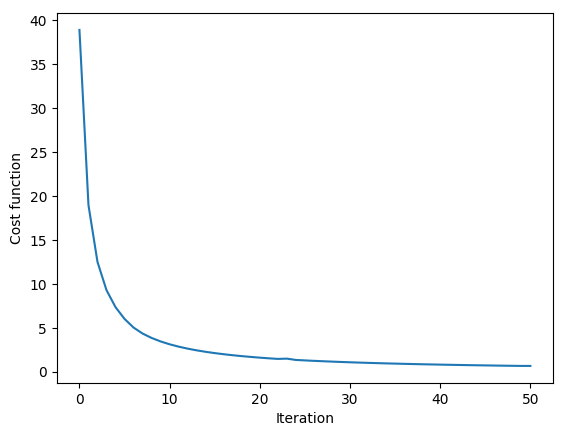

PyObject Text(24,0.5,u'Cost function')

In [10]:
wopt = copy(w) 
rate = 0.01
Niter = 50
Jval = zeros(Niter+1)

for i = 1:Niter
    # decrease regulaziation when iterating
    λ = 1/i

    Jval[i] = J(wopt,λ,x,y)
        
    # gradient descent
    wopt -= rate * ∇J(wopt,λ,x,y)
    
    if i <= 5
       plotboundary(wopt;label = "iter $(i)")
    end
end

# last value
Jval[Niter+1] = J(wopt,λ,x,y)
    
plotdata(x,y)
legend()
#plotboundary(wopt)

figure()
plot(Jval)
xlabel("Iteration")
ylabel("Cost function")


In [12]:
J(wopt,0.,x,y)


0.0